In this notebook we will try different automatic gray to binary transformation algorithms.

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [51]:
def plot_images(imgs_list, imgs_titles=[]):
    """
    Display a list of images with their titles using Matplotlib.

    Args:
    - imgs_list (list): List of images (as NumPy arrays) to be displayed.
    - imgs_titles (list, optional): List of titles for each image. Default is an empty list.

    Returns:
    - None

    Example:
    plot_images([img1, img2], ["Title 1", "Title 2"])
    """
    num_of_imgs = len(imgs_list)

    # Create a subplot with 1 row and 'num_of_imgs' columns
    fig, ax = plt.subplots(1, num_of_imgs, figsize=(12, 8))

    # Loop through the images and display them
    for i in range(num_of_imgs):
        ax[i].imshow(imgs_list[i], cmap='gray')  # Show the image
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        # Add title if titles are provided and the index is within range
        if len(imgs_titles) and i < len(imgs_titles):
            ax[i].set_title(imgs_titles[i])  # Set the title for the subplot


## We will try the following methods:

### Adaptive Thresholding:
- **cv2.ADAPTIVE_THRESH_MEAN_C:**
   - Calculates the threshold for a small region of the image, adjusting it for varying lighting conditions.

- **cv2.ADAPTIVE_THRESH_GAUSSIAN_C:**
   - Similar to mean, but the threshold value is the weighted sum of the neighborhood values.

### Otsu's Thresholding:
- **cv2.THRESH_OTSU:**
  - Determines an optimal threshold value by minimizing the intra-class variance of the binary image.

### Riddler-Calvard Thresholding:
- **cv2.THRESH_TRIANGLE:**
  - Determines the threshold based on the triangle method, where the threshold is found at the maximum of the histogram's longest side to the hypotenuse line.


In [43]:
def get_binary_images(gray_img):
    thresholded_A_mean = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                                cv2.THRESH_BINARY,11,2)
    thresholded_A_gaussian = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                            cv2.THRESH_BINARY, 11, 2)
    _, thresholded_Otsu = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    _, thresholded_triangle = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_TRIANGLE)   
    return [thresholded_A_mean, thresholded_A_gaussian, thresholded_Otsu, thresholded_triangle]

In [44]:
# read all images in images folder
# get the path of the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# get images folder
imgs_dir = os.path.join(parent_dir, "images")

# get images
images = []
for filename in os.listdir(imgs_dir):
    if filename.endswith(('jpg', 'jpeg', 'tif')):
        image_path = os.path.join(imgs_dir, filename)
        img = cv2.imread(image_path)
        images.append(img)


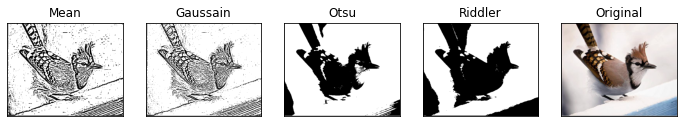

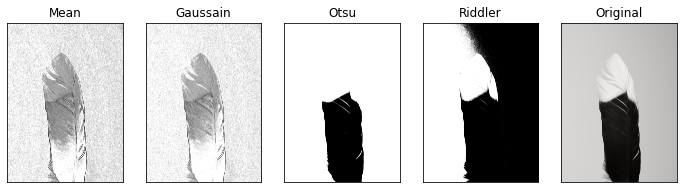

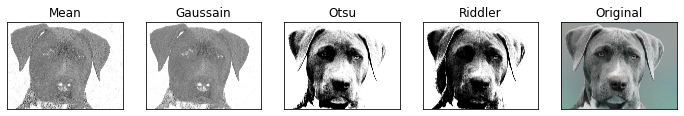

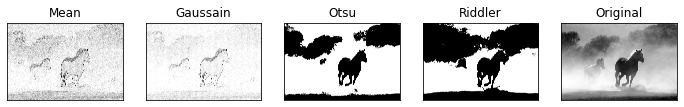

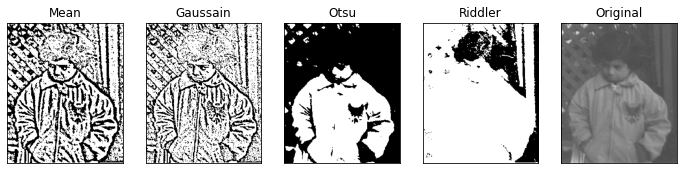

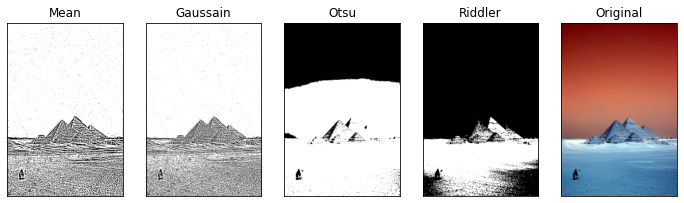

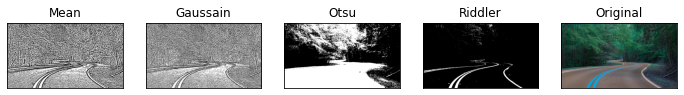

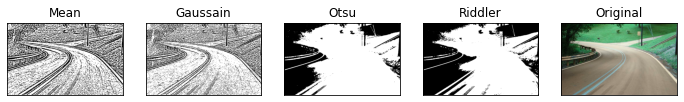

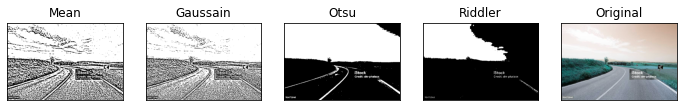

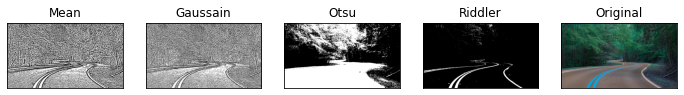

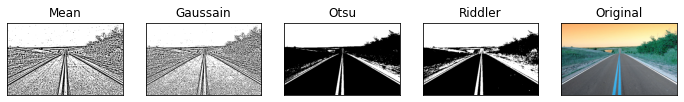

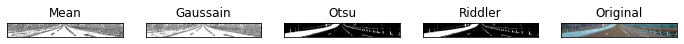

In [52]:
# Show images after applying transformation on them
for img in images:
    size = len(img.shape)
    if(size == 3):
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray_img = img

    binary_imgs = get_binary_images(gray_img)
    binary_imgs.append(img)
    plot_images(binary_imgs, ["Mean", "Gaussain", "Otsu", "Riddler", "Original"])

# Done!